In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))
%time

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
Found GPU at: /device:GPU:0
CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 7.15 µs


In [ ]:
!pip install opendatasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import opendatasets as od
import pandas
  
od.download(
    "https://www.kaggle.com/datasets/mostafaabla/garbage-classification/download")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: nandarlma
Your Kaggle Key: ··········


100%|██████████| 239M/239M [00:01<00:00, 178MB/s]


In [ ]:
import glob, os
import cv2 as cv
import pandas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img
from keras.layers import Conv2D, Flatten, MaxPooling2D, Dense, Dropout,BatchNormalization
from keras.models import Sequential

In [ ]:
base_path = '/content/garbage-classification/garbage_classification'

img_list = glob.glob(os.path.join(base_path, '*/*.jpg'))

print(len(img_list))

15515


In [ ]:
image_size = 512

train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=True,
    validation_split=0.2
)

test_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.1
)

train_generator = train_datagen.flow_from_directory(
    base_path,
    target_size=(image_size, image_size),
    batch_size=16,
    class_mode='categorical',
    subset='training',
    seed=0
)

validation_generator = test_datagen.flow_from_directory(
    base_path,
    target_size=(image_size, image_size),
    batch_size=16,
    class_mode='categorical',
    subset='validation',
    seed=0
)

labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())

print(labels)

Found 12415 images belonging to 12 classes.
Found 1545 images belonging to 12 classes.
{0: 'battery', 1: 'biological', 2: 'brown-glass', 3: 'cardboard', 4: 'clothes', 5: 'green-glass', 6: 'metal', 7: 'paper', 8: 'plastic', 9: 'shoes', 10: 'trash', 11: 'white-glass'}


In [ ]:
model = Sequential([
    Conv2D(32, kernel_size=3, activation='relu', input_shape=(image_size, image_size, 3)),
    MaxPooling2D(pool_size=2),

    Conv2D(64, kernel_size=3, activation='relu'),
    MaxPooling2D(pool_size=2),
    
    Conv2D(128, kernel_size=3, activation='relu'),
    MaxPooling2D(pool_size=2),
    Dropout(0.3),
    
    Flatten(),
    Dense(128, activation='relu'),

    Dense(64, activation='relu'),

    Dense(12, activation='softmax')
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 510, 510, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 255, 255, 32)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 253, 253, 64)      18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 126, 126, 64)     0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 124, 124, 128)     73856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 62, 62, 128)     

In [ ]:
from tensorflow import keras 
model.compile(loss = 'categorical_crossentropy', optimizer= 'adam',metrics=["accuracy",keras.metrics.Precision(),keras.metrics.Recall()])

In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)

history = model.fit_generator(train_generator,
                    epochs=20,
                    validation_data=validation_generator,
                    verbose = 1,
                    callbacks=[early_stopping])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


Epoch 1/20
776/776 [==============================] - 672s 847ms/step - loss: 1.4957 - accuracy: 0.5069 - precision: 0.7456 - recall: 0.3319 - val_loss: 1.4064 - val_accuracy: 0.5353 - val_precision: 0.7253 - val_recall: 0.3896
Epoch 2/20
776/776 [==============================] - 651s 839ms/step - loss: 1.1576 - accuracy: 0.6097 - precision: 0.7604 - recall: 0.4614 - val_loss: 1.2835 - val_accuracy: 0.5676 - val_precision: 0.7656 - val_recall: 0.4123
Epoch 3/20
776/776 [==============================] - 643s 829ms/step - loss: 1.0816 - accuracy: 0.6416 - precision: 0.7698 - recall: 0.5108 - val_loss: 1.1634 - val_accuracy: 0.5974 - val_precision: 0.7554 - val_recall: 0.4939
Epoch 4/20
776/776 [==============================] - 640s 825ms/step - loss: 1.0052 - accuracy: 0.6632 - precision: 0.7913 - recall: 0.5467 - val_loss: 1.1000 - val_accuracy: 0.6382 - val_precision: 0.7729 - val_recall: 0.5133
Epoch 5/20
776/776 [==============================] - 642s 827ms/step - loss: 0.9607 - a

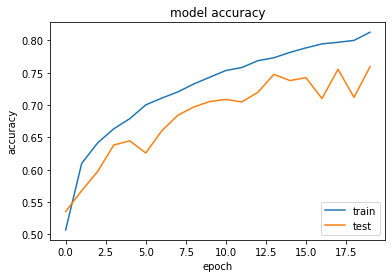

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("model accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(['train','test'],loc='lower right')
plt.show()

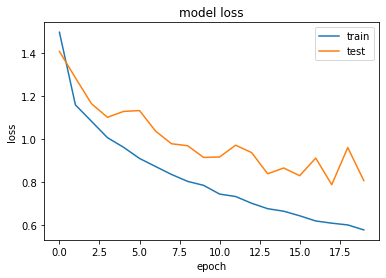

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(['train','test'],loc='upper right')
plt.show()

In [ ]:
model.save('waste_classification_dataset11.h5')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
